In [63]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [64]:
red_data = pd.read_csv("winequality-red.csv", sep=';', header=0)
white_data = pd.read_csv("winequality-white.csv", sep=';', header=0)
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [66]:
red_data['color'] = 1;
white_data['color'] = 0;
df= pd.concat([red_data, white_data], ignore_index = True, copy = False)
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [67]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [69]:
print(df.duplicated().sum())

1177


In [70]:
df=df.drop_duplicates()

In [71]:
print(df.duplicated().sum())

0


In [72]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'color'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

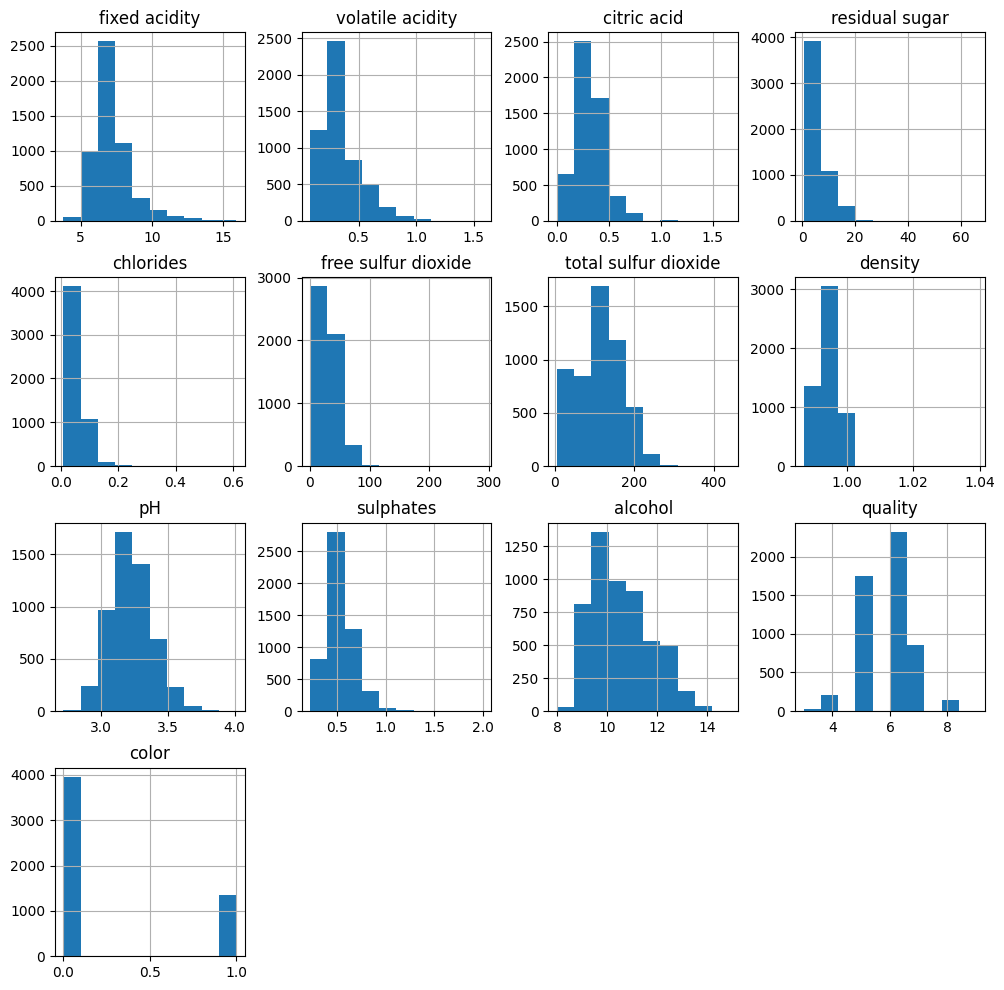

In [73]:
df.hist(xlabelsize=10,ylabelsize=10,figsize=(12,12))

<Axes: >

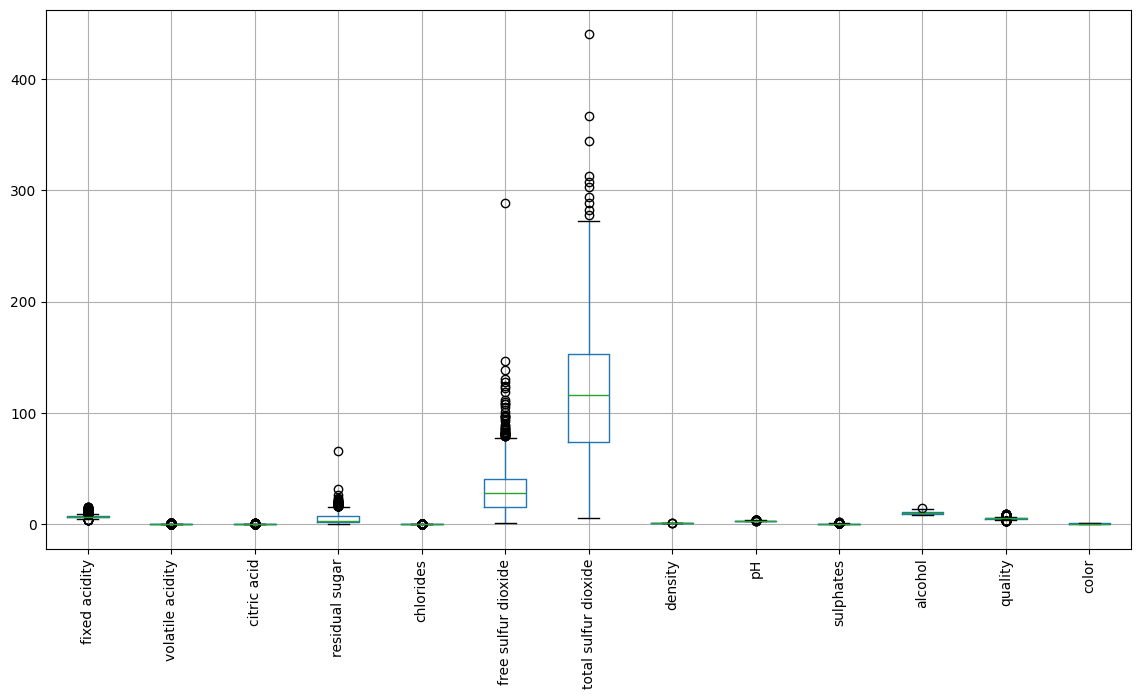

In [74]:
df.boxplot(figsize=(14,7),rot=90)

In [76]:
df['quality'] = df['quality'].apply(lambda x: 2 if x > 6 else (1 if x > 4 else 0))
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,1.144549,0.255451
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.462515,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,1.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,1.000000,0.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,1.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,2.000000,1.000000


In [77]:
y = df.quality
df.drop('quality', axis=1, inplace=True)
df_train, df_temp, y_train, y_temp = train_test_split(df, y, random_state=0, test_size=0.2)
df_dev, df_test, y_dev, y_test = train_test_split(df_temp, y_temp, random_state=0, test_size=0.5)


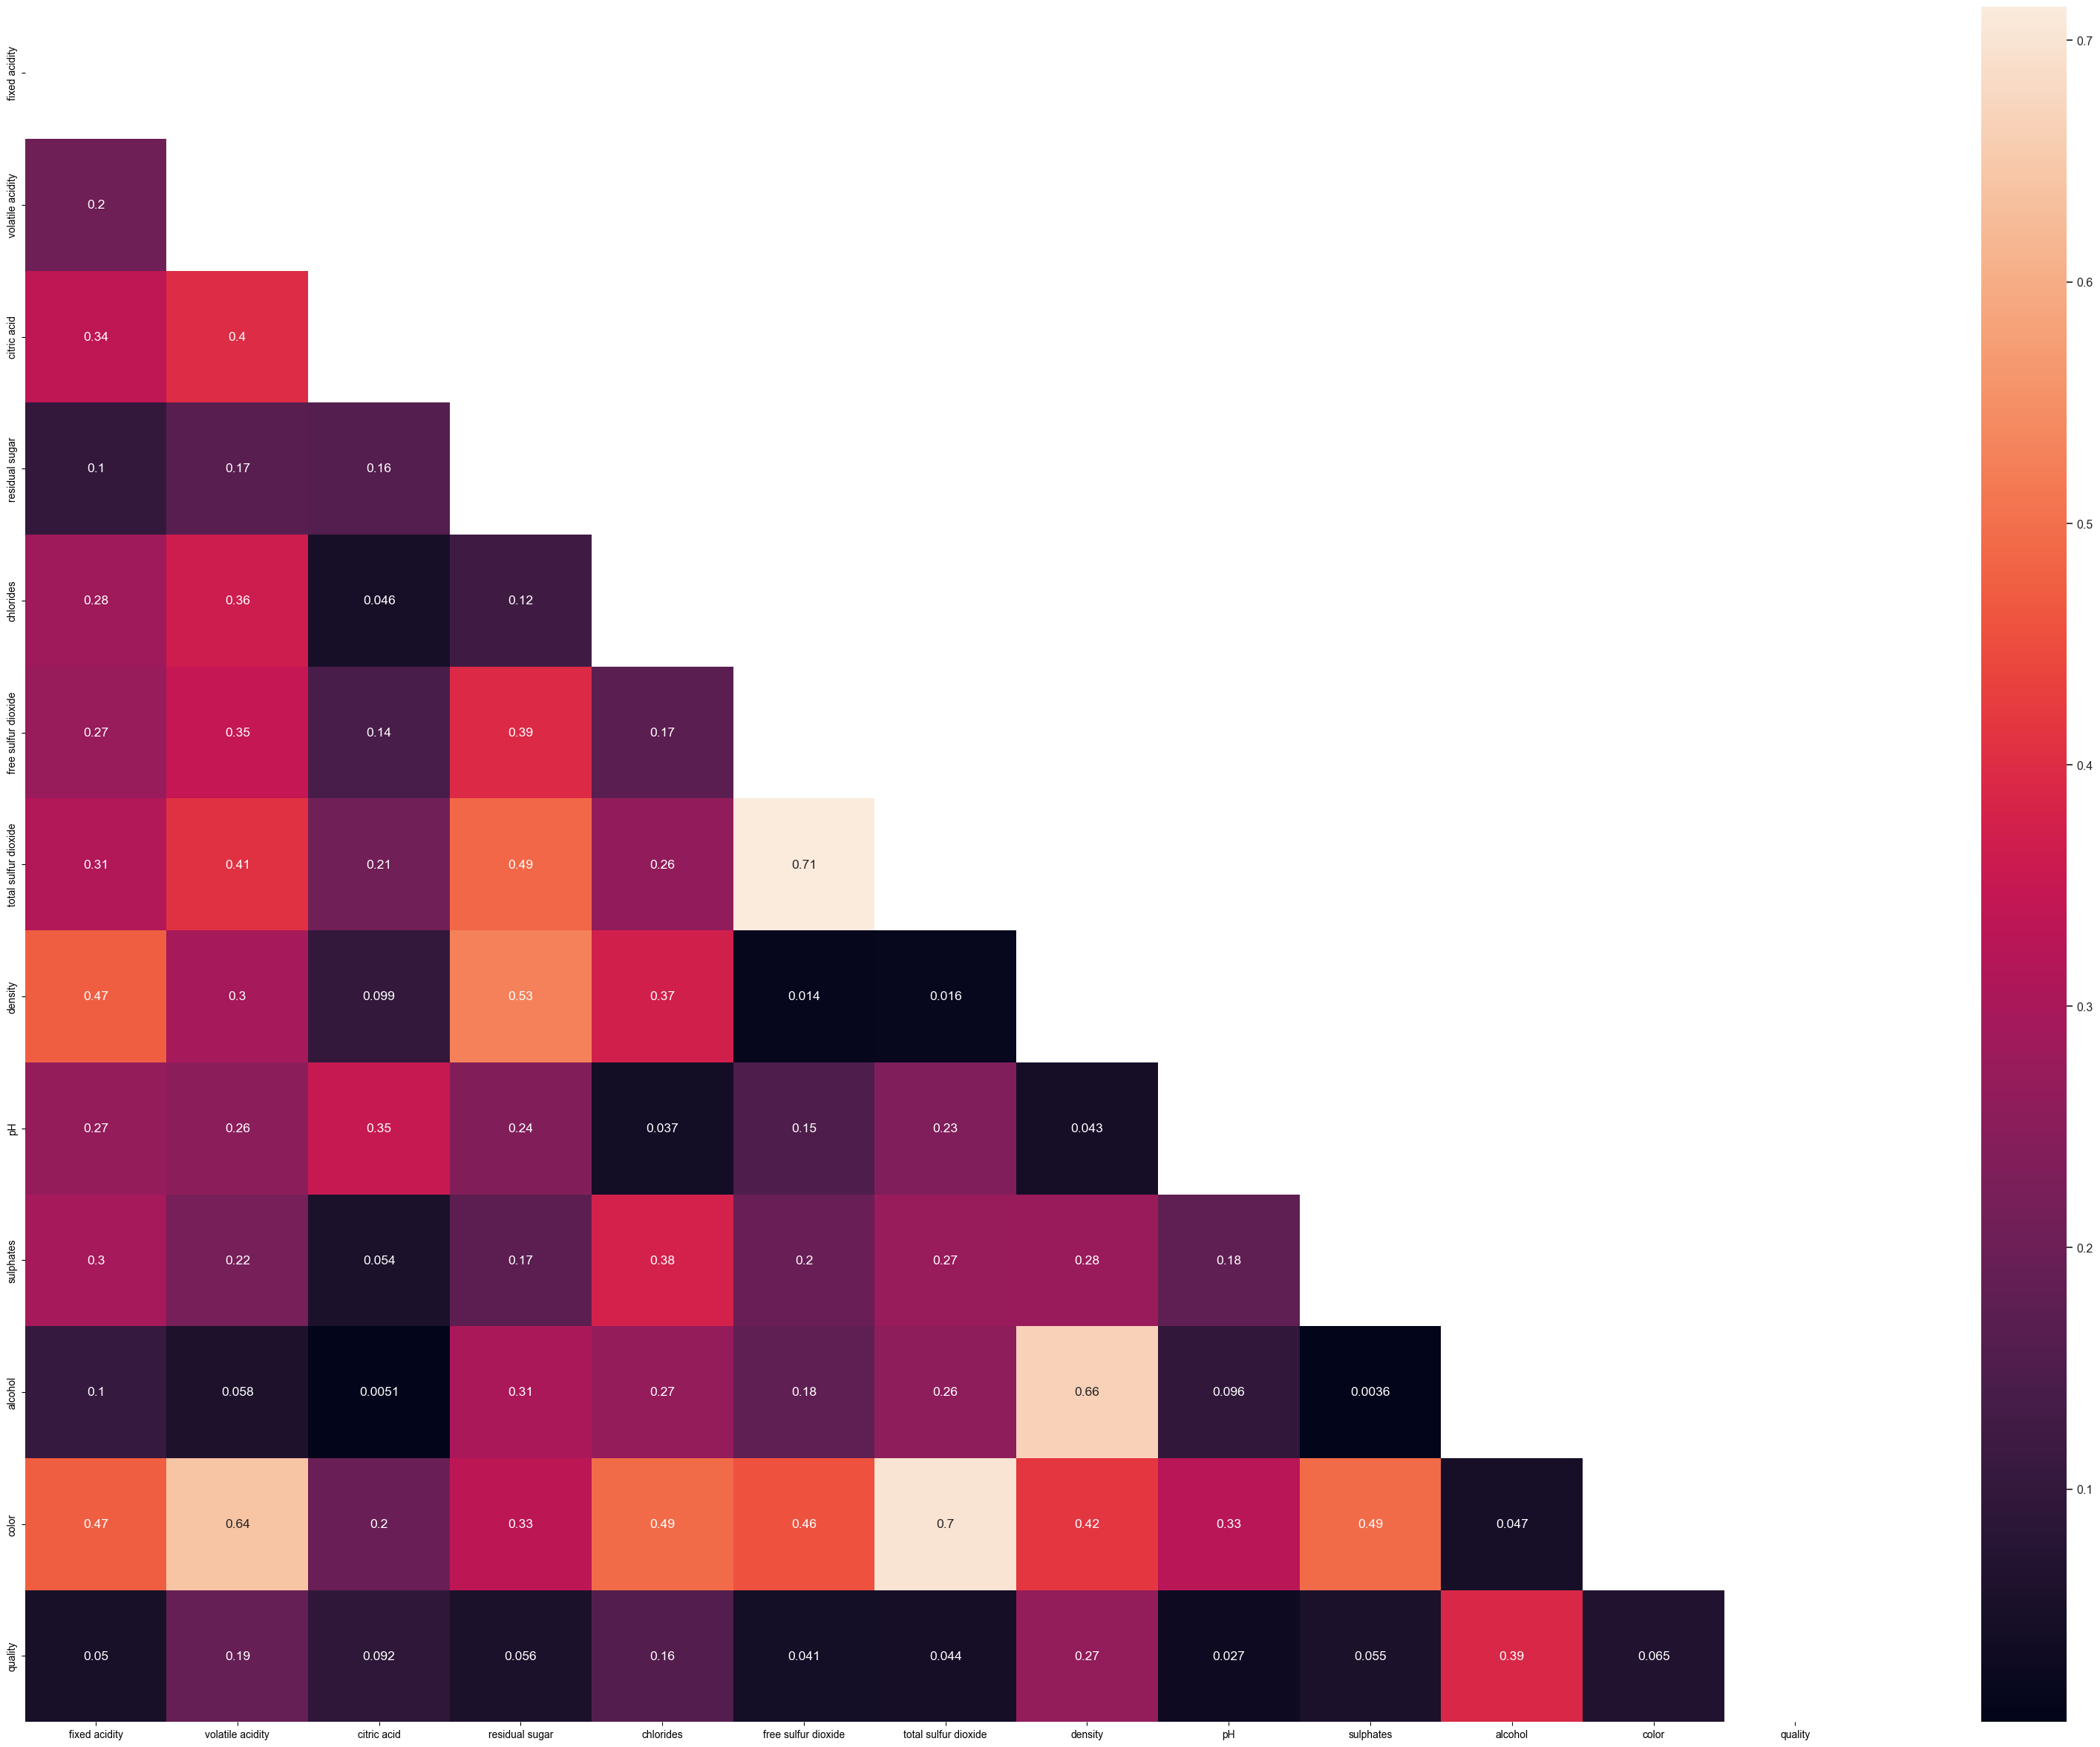

In [78]:
corr_mat = abs(pd.concat([df_train, y_train], axis=1).corr())
fig, ax = plt.subplots(figsize=(40, 30))
sns.set(font_scale=1.05)
sns.heatmap(corr_mat, annot=True, mask=np.triu(corr_mat))
plt.show()


In [85]:
from sklearn.metrics import precision_score, recall_score, f1_score
xgb_model = XGBClassifier(
    n_estimators=3000,
    learning_rate=0.01,
    max_depth=9,
    min_child_weight=1,
    alpha=0.1,
    gamma=0.01,
    subsample=0.6,
    colsample_bytree=0.6,
    n_jobs=-1
)

xgb_model.fit(df_train, y_train, verbose=False)

print(f'accuracy of xgb_model = {accuracy_score(y_dev, xgb_model.predict(df_dev))}')

# Predicciones del modelo XGBoost
y_pred_xgb = xgb_model.predict(df_dev)

# Evaluar precisión, recall y F1-score
precision_xgb = precision_score(y_dev, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_dev, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_dev, y_pred_xgb, average='weighted')

print(f'XGBoost Model: \nPrecision: {precision_xgb}\nRecall: {recall_xgb}\nF1-score: {f1_xgb}')



accuracy of xgb_model = 0.7894736842105263
XGBoost Model: 
Precision: 0.7609485314593673
Recall: 0.7894736842105263
F1-score: 0.7585981173346326


In [86]:
rforest = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=0)
rforest.fit(df_train, y_train)
print(f'accuracy of rforest = {accuracy_score(y_dev, rforest.predict(df_dev))}')
# Predicciones del modelo RandomForest
y_pred_rf = rforest.predict(df_dev)

# Evaluar precisión, recall y F1-score
precision_rf = precision_score(y_dev, y_pred_rf, average='weighted')
recall_rf = recall_score(y_dev, y_pred_rf, average='weighted')
f1_rf = f1_score(y_dev, y_pred_rf, average='weighted')

print(f'RandomForest Model: \nPrecision: {precision_rf}\nRecall: {recall_rf}\nF1-score: {f1_rf}')


accuracy of rforest = 0.7913533834586466
RandomForest Model: 
Precision: 0.7488113666519239
Recall: 0.7913533834586466
F1-score: 0.749650016382212


c:\Users\feded\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_dev_scaled = scaler.transform(df_dev)
logreg_model = LogisticRegression(max_iter=2000, random_state=0)
logreg_model.fit(df_train_scaled, y_train)
print(f'accuracy of Logistic Regression = {accuracy_score(y_dev, logreg_model.predict(df_dev_scaled))}')
y_pred_logreg = logreg_model.predict(df_dev_scaled)
precision_logreg = precision_score(y_dev, y_pred_logreg, average='weighted', zero_division=1)
recall_logreg = recall_score(y_dev, y_pred_logreg, average='weighted', zero_division=1)
f1_logreg = f1_score(y_dev, y_pred_logreg, average='weighted', zero_division=1)
print(f'Logistic Regression Model: \nPrecision: {precision_logreg}\nRecall: {recall_logreg}\nF1-score: {f1_logreg}')


accuracy of Logistic Regression = 0.7556390977443609
Logistic Regression Model: 
Precision: 0.7184166422888227
Recall: 0.7556390977443609
F1-score: 0.706943230453414


In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(df_train, y_train)
print(f'accuracy of K-Nearest Neighbors = {accuracy_score(y_dev, knn_model.predict(df_dev))}')
y_pred_knn = knn_model.predict(df_dev)
precision_knn = precision_score(y_dev, y_pred_knn, average='weighted', zero_division=1)
recall_knn = recall_score(y_dev, y_pred_knn, average='weighted', zero_division=1)
f1_knn = f1_score(y_dev, y_pred_knn, average='weighted', zero_division=1)
print(f'K-Nearest Neighbors Model: \nPrecision: {precision_knn}\nRecall: {recall_knn}\nF1-score: {f1_knn}')


accuracy of K-Nearest Neighbors = 0.7124060150375939
K-Nearest Neighbors Model: 
Precision: 0.6528438720245012
Recall: 0.7124060150375939
F1-score: 0.6675182803613569


**Random Forest parece ser la mejor opción en términos de precisión**